# Intro to datascience

The purpose of this project is to apply the CRISP-DM process to study listings data. As a quick recap, CRISP-DM is based on 6 important points : 

* 1.Business Understanding
* 2.Data Understanding
* 3.Prepare Data
* 4.Model Data
* 5.Results
* 6.Deploy

We will try to evaluate the given data and to fill in each step of the CRISP-DM to practice our skills and to learn more about data science .

In [1]:
#importing relevant libraries that will be needed during this study

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import math
import statsmodels.api as sm;
from statsmodels.stats.outliers_influence import variance_inflation_factor

from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


# Business understanding

AirBnB stand for "Air Bed and Breakfast". It is an American company that operates an online marketplace for lodging, primarily homestays for vacation rentals, and tourism activities. Based in San Francisco, California, the platform is accessible via website and mobile app.


![image info](https://upload.wikimedia.org/wikipedia/commons/thumb/6/69/Airbnb_Logo_B%C3%A9lo.svg/1024px-Airbnb_Logo_B%C3%A9lo.svg.png)


Airbnb provides a platform for hosts to accommodate guests with short-term lodging and tourism-related activities. Guests can search for lodging using filters such as lodging type, dates, location, and price, and can search for specific types of homes, such as bed and breakfasts, unique homes, and vacation homes. [wikipedia](https://en.wikipedia.org/wiki/Airbnb#Overview)

The provided services always equates to tones of data gathered during evry process of booking a listed place. The created dataset contains data related to pricings, locations, reviews, amenities details ....

**Our objective in this study is simple, build a model based on the listings caracteristics to evaluate the price. We can think of caracteristics like number of bedroms, bathroms, neightborhood ...**

# Data Understanding

## Description 

The data that will be studied is related to seatle.

Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Seattle, WA.

The following Airbnb activity is included in this Seattle dataset:
* **Listings, including full descriptions and average review score**
* **Reviews, including unique id for each reviewer and detailed comments**
* **Calendar, including listing id and the price and availability for that day**

This dataset is part of Airbnb Inside, and the original source can be found [here](http://insideairbnb.com/get-the-data.html).

## Assessment : listings


In [2]:
#data importing
listings=pd.read_csv('listings.csv')

In [3]:
#lets check the first lines of the table

listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


The table contains 92 columns and we already can see that they all contain different types of data , randing from links, timestamps, dates, numerical values and plain text . Lets use the info method..

In [4]:
#info method on df 

listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

92 columns and 3818 entries. We have foalt , int and object types and several columns apear to contain nulls

## Assessment : calendar


In [5]:
#importing calendar data
calendar=pd.read_csv('calendar.csv')

In [6]:
#checking the calendar dataframe using head
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


Visibly, the table contains only 4 columns. date column contains date formated values.

In term of the table's content, we can see that calendar dataframe decribe for each listing , the availability, the price if available and the date of listing

In [7]:
#geting more info from the dataframe using info
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


We have a total of 1393570 entriers . Price column contains null values and only the listing_id column is numerical type , while the others are all object type

## Assessment : reviews


In [8]:
#importing calendar data
reviews=pd.read_csv('reviews.csv')

In [9]:
#checking the calendar dataframe using head
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


Visibly, the table contains 6 column. 

In term of content, we can see that the reviews table contains a listing_id that can be used to join data with calendar dataframe, a specific id for each review, the date of review, in addotion the reviewers'id, name and comments

In [10]:
#geting more info from the dataframe using info
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


We have a total of 84849 entriers .only the comments column contain nulls. We have also a total of 3 numerical type column and 3 counted as object type

# Data Preparation

Data preparation is mostly about fixing the issues, cleaning, tidying untidy data and select relevent data that will be key for modeling and deploying steps.

The preliminary assessement helped to get closer to the data and to evaluate the errors within the dataset

NOW, we will proceed by following these steps :

* **Select relevent data from each dataframe**
* **define quality issues within dataset**
* **Correct the issues by using a Clean/test methodology**
* **EDA on cleaned data to further study the content for feature engineering**
* **Feature engineering**
* **Output the final clean dataset that will be studying in the next section**

## 1 Select relevent data from each dataframe

Since our study focus mainly on pricing modeling using listings's caracteristics. All of these infos can be found in the listing table to we will be focusing on that for the current study

In [11]:
select_cols=['bathrooms','bedrooms','beds','guests_included','price','property_type','room_type','bed_type','neighbourhood']

In [12]:
sub_listings=listings[select_cols]

## 2 Define the issues within dataset

Since we have few columns we will check each column . To avoid repeating our self we will write a simple function to evaluate each column 

In [13]:
def col_eval(df,column):
    
    
    """
    Simple function to evaluate quality of columns
    
    args : dataframe, column 
    
    output : number nan values, number of values in columns, number of unique values 
            type of values, show a sample from the colmn, sorted valye count
    """
    
    print('Number of Nan values is',
          df[column].isna().sum(),
          '\nNumber of values in the column is ',
          len(df[column]),
          '\nNumber of unique values in the column is',
          df[column].nunique(),
          '\ntype of values in the column is',
          df[column].dtypes,
          '\nSample value from column is',
          df[column].sample(1).values[0],
          '\n\nThe sorted value count is\n\n',
          df[column].value_counts().sort_values()
          
    )


### Define issues in column : bathrooms

Presence of 16 nulls within the column

In [14]:
col_eval(sub_listings,'bathrooms')

Number of Nan values is 16 
Number of values in the column is  3818 
Number of unique values in the column is 12 
type of values in the column is float64 
Sample value from column is 1.0 

The sorted value count is

 5.0       2
8.0       2
4.5       3
0.0       8
4.0       8
0.5      31
3.5      57
3.0      64
2.5     124
1.5     248
2.0     373
1.0    2882
Name: bathrooms, dtype: int64


### Define issues in column : bedrooms

Presence of 6 nulls within the column

In [15]:
col_eval(sub_listings,'bedrooms')

Number of Nan values is 6 
Number of values in the column is  3818 
Number of unique values in the column is 8 
type of values in the column is float64 
Sample value from column is 0.0 

The sorted value count is

 7.0       1
6.0       6
5.0      24
4.0      69
3.0     283
0.0     372
2.0     640
1.0    2417
Name: bedrooms, dtype: int64


### Define issues in column : beds

Presence of 1 nulls within the column

In [16]:
col_eval(sub_listings,'beds')

Number of Nan values is 1 
Number of values in the column is  3818 
Number of unique values in the column is 11 
type of values in the column is float64 
Sample value from column is 3.0 

The sorted value count is

 15.0       1
10.0       2
8.0        4
9.0        4
7.0       14
6.0       21
5.0       73
4.0      152
3.0      433
2.0      912
1.0     2201
Name: beds, dtype: int64


### Define issues in column : price

No nulls to report but we notice that prices are joined with a \$ sign and listed of object. we will also need to remove comas 

In [17]:
col_eval(sub_listings,'price')

Number of Nan values is 0 
Number of values in the column is  3818 
Number of unique values in the column is 273 
type of values in the column is object 
Sample value from column is $132.00 

The sorted value count is

 $365.00      1
$255.00      1
$673.00      1
$276.00      1
$217.00      1
          ... 
$99.00     110
$95.00     110
$75.00     118
$100.00    159
$150.00    162
Name: price, Length: 273, dtype: int64


### Define issues in column : property_type

One null entry should be treated

In [18]:
col_eval(sub_listings,'property_type')

Number of Nan values is 1 
Number of values in the column is  3818 
Number of unique values in the column is 16 
type of values in the column is object 
Sample value from column is Condominium 

The sorted value count is

 Yurt                  1
Chalet                2
Dorm                  2
Treehouse             3
Tent                  5
Boat                  8
Camper/RV            13
Bungalow             13
Cabin                21
Other                22
Bed & Breakfast      37
Loft                 40
Condominium          91
Townhouse           118
Apartment          1708
House              1733
Name: property_type, dtype: int64


### Define issues in column : neighbourhood

A total of 416 null values

In [19]:
col_eval(sub_listings,'neighbourhood')

Number of Nan values is 416 
Number of values in the column is  3818 
Number of unique values in the column is 81 
type of values in the column is object 
Sample value from column is Lower Queen Anne 

The sorted value count is

 Roxhill                 1
Fairmount Park          1
North College Park      1
South Park              2
Pike Market             2
                     ... 
Queen Anne            187
Minor                 192
Belltown              204
Ballard               213
Capitol Hill          351
Name: neighbourhood, Length: 81, dtype: int64


In [20]:
sub_listings.isna().sum().sum()

440

## 3 Correct the quality issues by using a Clean/test methodology

The defined issues can be summerized as followed :

* **A total of 440 nulls in the whol subseted dataset. We can simply proceed by removing the null containing entries since the overall number is small**
* **Price should be cleaned by removing the dollar sign. For this we will simply use the replace method to remove the dollar sign**
* **price column type should be changed to numerical**

### removing nulls

In [21]:
#cleaning

sub_listings.dropna(inplace=True)

D:\WORK\PYTHON\envs\PYTHON36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
#testig

sub_listings.isna().sum().sum()

0

### replacing dollarsign in price

In [23]:
#cleaning

sub_listings['price']=sub_listings['price'].apply(lambda x: x.replace('$',''))

sub_listings['price']=sub_listings['price'].apply(lambda x: x.replace(',',''))

D:\WORK\PYTHON\envs\PYTHON36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\WORK\PYTHON\envs\PYTHON36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [24]:
#testing

In [25]:
sub_listings['price']

0        85.00
1       150.00
2       975.00
3       100.00
4       450.00
         ...  
3811     65.00
3812     95.00
3813    359.00
3814     79.00
3817     87.00
Name: price, Length: 3379, dtype: object

### change type of price column

In [26]:
#cleaning

sub_listings['price']=sub_listings['price'].astype('float')

D:\WORK\PYTHON\envs\PYTHON36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
#testing

In [28]:
sub_listings['price'].dtypes

dtype('float64')

## 4 EDA on data to further assess the content of cleaned data

We will check each of our cleaned columns to further analyse how histograms behave, to identify quantitativly what type of data we are dealing with and to check if we have any anomaly or outliers that should be adressed

Again, to limit the repetitions, we will write two functions. The numerical type data will plot a box plot a histogram and a simple statistical summary.

The categorical data will be analysed using count plots and a simple summary statictis

In [29]:
def category_data_plots(data, attribute,wideness='wide',ascending=True):
    
    """
    Function that give a countplot for a given object type column and show a small sumary statistic table
    
    args : data: dataframe, attribute : column name, wideness: wide or long default is wide, asencing : default is true
    
    return count plot and summary stat table
    
    """

        
    
    totalbeds=sub_listings[attribute].value_counts().sum()

    values_table=((sub_listings.groupby(attribute).count().iloc[:,1]/totalbeds)*100).sort_values(ascending=ascending)

    index_values=list(values_table.index)    
    
    
    
    
    if wideness=='long':
        
        shape=(8, 15)
        
        fig=plt.figure(figsize=shape)
        
        plt.barh(index_values,values_table)
    else:
        shape=(15,8)    
        
        fig=plt.figure(figsize=shape)
        
        plt.bar(index_values,values_table)
    


       
            
    print('Stat table attribute: \n',data[attribute].describe())
    
    print('\n count for each value : \n',data[attribute].value_counts())
    
    print('\n The most comon value is : ', list(stats.mode(data[attribute])[0])[0])


In [30]:
def numeric_data_plots(data, attribute, binsv=10):

    """
    Function that give a histogram and a boxplot for a given numerical type column and show a small sumary statistic table
    
    args : data: dataframe, attribute : column name, binsv=: number of bins for histogram, default is 10
    
    return histogram, boxplot and a summary stat table
    
    """
    
    
    fig = plt.figure(figsize=(20, 5))
    
    
    gridsize=(1,2)
    
    

    
    ax1 = plt.subplot2grid(gridsize, (0, 0),colspan=1, rowspan=1)
    
    ax1.title.set_text(f'histogram plot of {attribute}')
    
    
    sb.histplot(data['{}'.format(attribute)], ax=ax1,bins=binsv);


        
    ax2 = plt.subplot2grid(gridsize, (0, 1),colspan=1, rowspan=1)
    
    ax2.title.set_text(f'boxplot of {attribute}')
    
    
    sb.boxplot(x=data['{}'.format(attribute)], ax=ax2);
    
    print(data[attribute].describe())
    
    print('\n The most comon value is : ', list(stats.mode(data[attribute])[0])[0])

### EDA on column : price

The plots show that the price data is highly skewed to the right. We can clearly see that 25% of the listings have a price above 150. The maximum value is 1000 and the minimum is 20 which give us a range of 980. This difference needs to be adressed later on either by removing outlier or transforming data.

count    3379.000000
mean      129.366972
std        91.416122
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max      1000.000000
Name: price, dtype: float64

 The most comon value is :  150.0


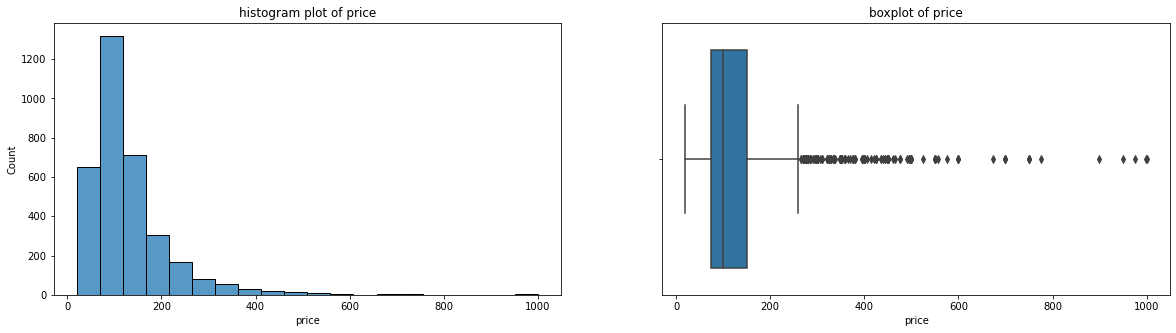

In [31]:
numeric_data_plots(sub_listings,'price',20)

### EDA on column : beds

we have 75% of listings with number of beds less or equal to two, with a minimum of 1 bed and a maximum of 15

The dataset is skewed to the right and that is linked to the presence of some listings with very high count of beds (from 4 to 15 !! )

count    3379.000000
mean        1.754365
std         1.152664
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        15.000000
Name: beds, dtype: float64

 The most comon value is :  1.0


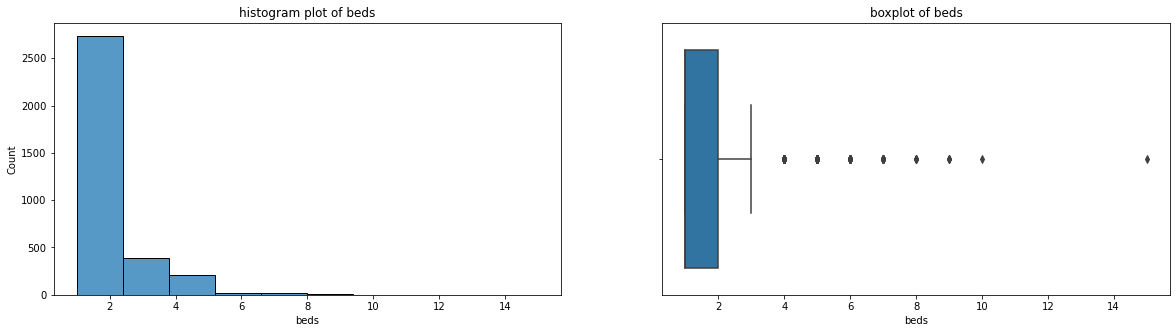

In [32]:
numeric_data_plots(sub_listings,'beds')

### EDA on column : bathrooms

Some values of bathroom counts are containing decimal values (2.5 bathrooms) which is not logic. We will deal with it later by flooring values to the closed integer

As for descriptive statistics, we have a maximum 8 bathromms and a minimum of 0 . The median number of bathrooms is 1

count    3379.000000
mean        1.266499
std         0.600293
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         8.000000
Name: bathrooms, dtype: float64

 The most comon value is :  1.0


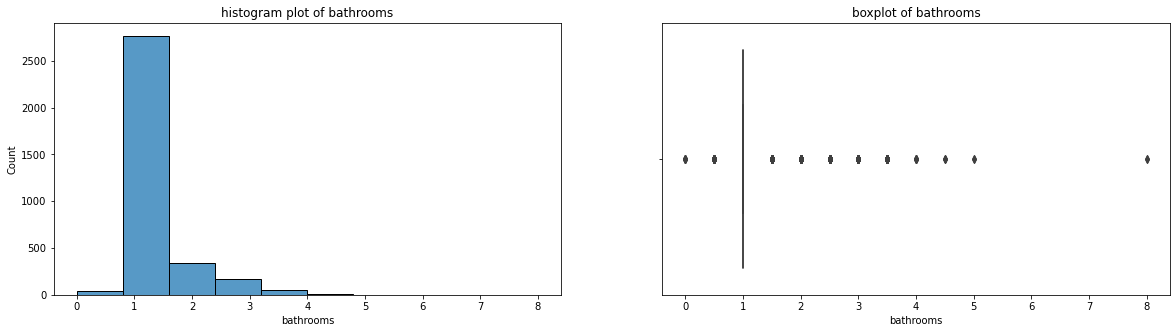

In [33]:
numeric_data_plots(sub_listings,'bathrooms')

### EDA on column : bedrooms

We have a minimm of 0 bedrooms and a maximum of 6 . The median value is 1 bedroom per listing.

count    3379.000000
mean        1.320805
std         0.887424
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         6.000000
Name: bedrooms, dtype: float64

 The most comon value is :  1.0


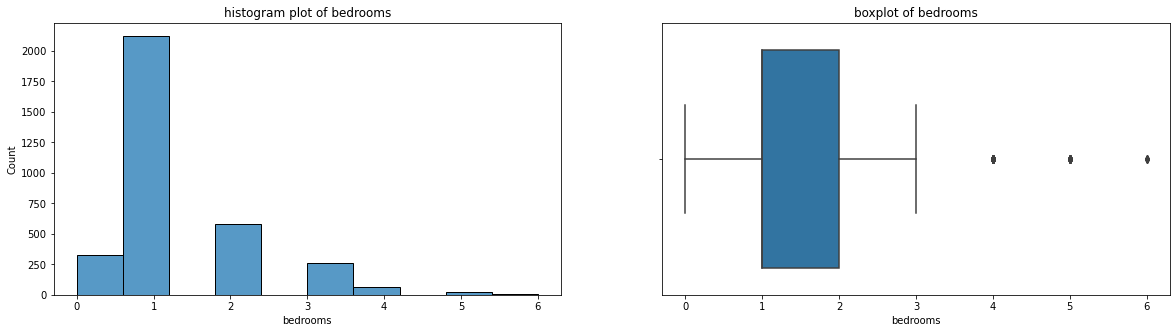

In [34]:
numeric_data_plots(sub_listings,'bedrooms')

### EDA on column : room_type

Entire  home/appt are the most listed, followed by private rooms and shared rooms . 

In [35]:
sub_listings['room_type']=sub_listings['room_type'].astype('category')

D:\WORK\PYTHON\envs\PYTHON36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Stat table attribute: 
 count                3379
unique                  3
top       Entire home/apt
freq                 2268
Name: room_type, dtype: object

 count for each value : 
 Entire home/apt    2268
Private room       1013
Shared room          98
Name: room_type, dtype: int64

 The most comon value is :  Entire home/apt


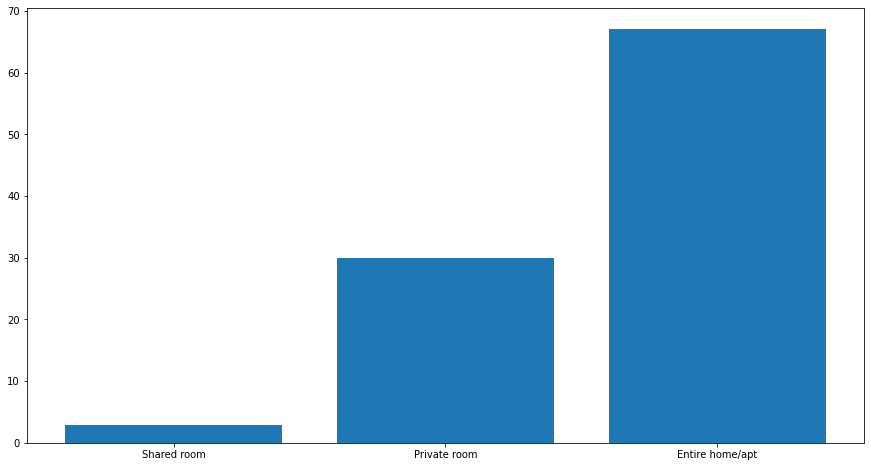

In [36]:
category_data_plots(sub_listings,'room_type')

### EDA on column : bed_type

Real bed listings are the most available with a large margin

In [37]:
sub_listings['bed_type']=sub_listings['bed_type'].astype('category')

D:\WORK\PYTHON\envs\PYTHON36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Stat table attribute: 
 count         3379
unique           5
top       Real Bed
freq          3234
Name: bed_type, dtype: object

 count for each value : 
 Real Bed         3234
Futon              69
Pull-out Sofa      42
Airbed             23
Couch              11
Name: bed_type, dtype: int64

 The most comon value is :  Real Bed


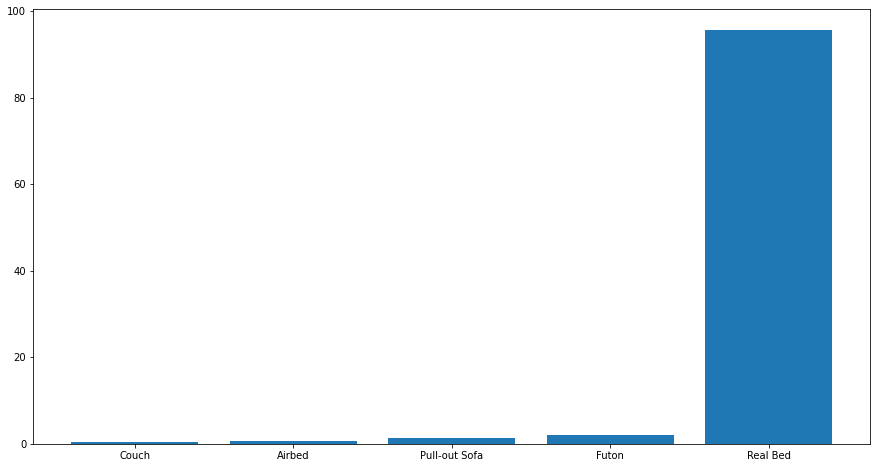

In [38]:
category_data_plots(sub_listings,'bed_type')

### EDA on column : property_type

Homes and appartements are the two top most used listings. Yurt and Chalet are two least counted.

In [39]:
sub_listings['property_type']=sub_listings['property_type'].astype('category')

D:\WORK\PYTHON\envs\PYTHON36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Stat table attribute: 
 count      3379
unique       16
top       House
freq       1546
Name: property_type, dtype: object

 count for each value : 
 House              1546
Apartment          1502
Townhouse           106
Condominium          83
Bed & Breakfast      35
Loft                 34
Cabin                20
Other                15
Bungalow             12
Camper/RV             9
Boat                  6
Tent                  5
Treehouse             2
Dorm                  2
Yurt                  1
Chalet                1
Name: property_type, dtype: int64

 The most comon value is :  House


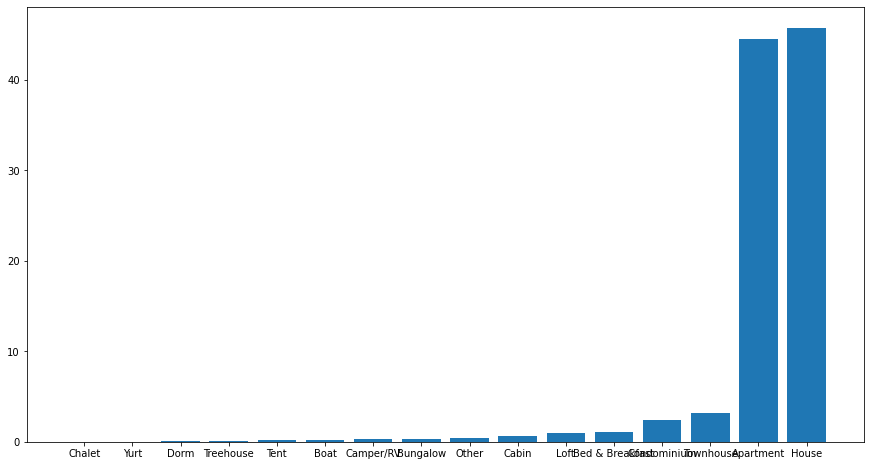

In [40]:
category_data_plots(sub_listings,'property_type')

### EDA on column : guests_included

The obtained histogram is skewed to the right, indicating large values that moves the mean to the right.

We have a maximum of 15 guests possible, a minimum of 0 guests and a median of 1 guest

count    3379.000000
mean        1.709973
std         1.330715
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        15.000000
Name: guests_included, dtype: float64

 The most comon value is :  1


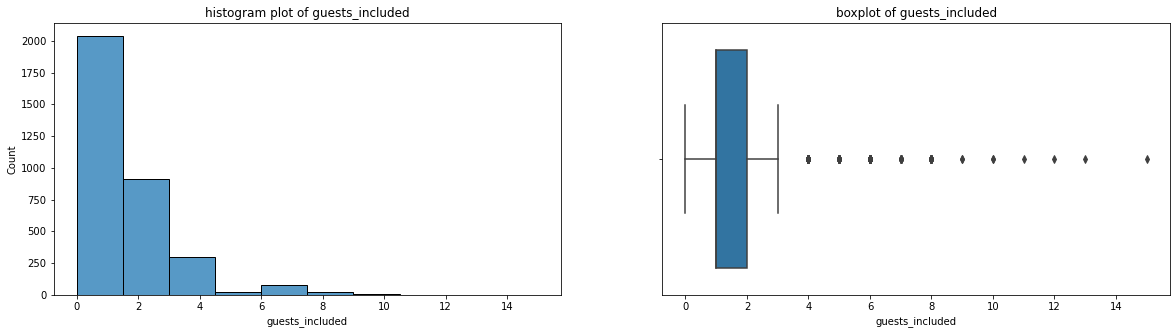

In [41]:
numeric_data_plots(sub_listings,'guests_included')

### EDA on column : neighbourhood

Capotiol hill is the most represented neighbourhood , followed by ballard. The least represented is roxhill

In [42]:
sub_listings['neighbourhood']=sub_listings['neighbourhood'].astype('category')

D:\WORK\PYTHON\envs\PYTHON36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Stat table attribute: 
 count             3379
unique              80
top       Capitol Hill
freq               347
Name: neighbourhood, dtype: object

 count for each value : 
 Capitol Hill         347
Ballard              213
Belltown             199
Minor                192
Queen Anne           187
                    ... 
South Beacon Hill      2
South Park             2
Pike Market            2
Fairmount Park         1
Roxhill                1
Name: neighbourhood, Length: 80, dtype: int64

 The most comon value is :  Capitol Hill


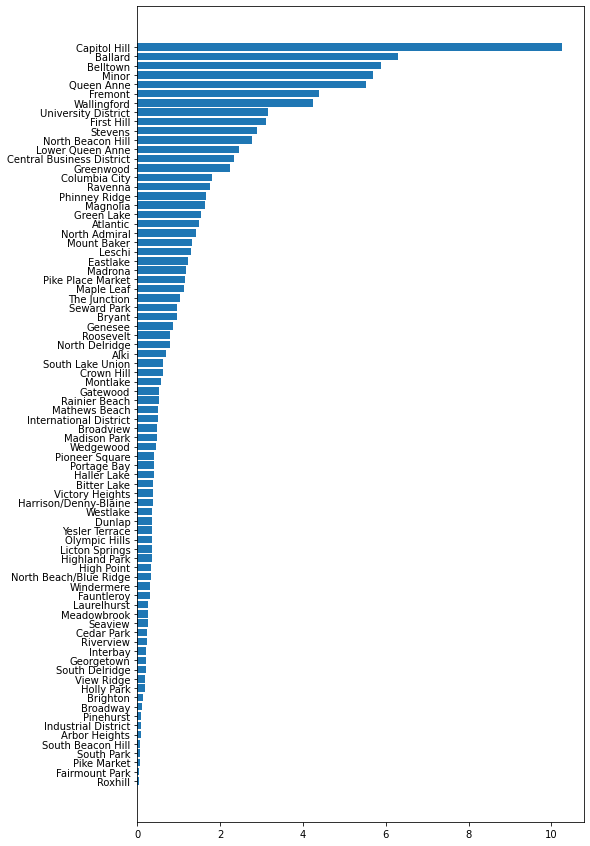

In [43]:
category_data_plots(sub_listings,'neighbourhood','long')

A quick conclusion obtained from these data , the most present number within the dataset for each feature are : 
* **price : 150**
* **bathrooms : 1**
* **bedrooms: 1**
* **room_type : entire home/appt**
* **bed_type: real bed**
* **proprety type: house**
* **guests included: 1**
* **neighborhood: capitol hill**

## 5 Feature engineering

In this part, we will take into account the results of EDA analysis and we will transform/prepare our features, prior to modeling and implementing:


* To avoid overfitting, we will remove outliers from highly skewd price data. For that reason, we put down a function that provide a filtred datafram, for a given column and some limits on the IQR.
* The bathroom column contains values that needs to be floord ( no meaning to 1.5 bathroms)
* The categorical data needs to be one hot encoded. This will help to make the data usable during modeling.
* Base line definition

In [44]:
#writing down the subseting function by iqr for outliers

def subset_by_iqr(df, column, whisker_width=1.5):
    
    """Remove outliers from a dataframe by column, including optional 
       whiskers, removing rows for which the column value are 
       less than Q1-1.5IQR or greater than Q3+1.5IQR.
    Args:
        df (`:obj:pd.DataFrame`): A pandas dataframe to subset
        column (str): Name of the column to calculate the subset from.
        whisker_width (float): Optional, loosen the IQR filter by a
                               factor of `whisker_width` * IQR.
    Returns:
        (`:obj:pd.DataFrame`): Filtered dataframe
    """
    # Calculate Q1, Q2 and IQR
    q1 = df[column].quantile(0.25)                 
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    # Apply filter with respect to IQR, including optional whiskers
    filter = (df[column] >= q1 - whisker_width*iqr) & (df[column] <= q3 + whisker_width*iqr)
    return df.loc[filter]                                                     



In [45]:
#filtering data using iqr function

filtred_susbet=subset_by_iqr(sub_listings,'price', whisker_width=1.5)
filtred_susbet.reset_index(drop=True, inplace=True)

In [46]:
# The bathroom column contains values that needs to be floored

filtred_susbet['bathrooms']=filtred_susbet['bathrooms'].apply(lambda x: math.floor(x))

D:\WORK\PYTHON\envs\PYTHON36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [47]:
#We will drop the most comon values in the dataset as baseline for our regression modeling


#House  droped as baseline

proprety_type_dummied=pd.get_dummies(filtred_susbet['property_type'],prefix='property_type').\
drop(columns='property_type_House')

#Entime home/appt  as baseline

room_type_dummied=pd.get_dummies(filtred_susbet['room_type'],prefix='room_type').\
drop(columns='room_type_Entire home/apt')

#real bed as baseline for type of bed

bed_type_dummied=pd.get_dummies(filtred_susbet['bed_type'],prefix='bed_type').\
drop(columns='bed_type_Real Bed')

#capitol hill as the baseline for neighborhoods
neighbourhood_dummied=pd.get_dummies(filtred_susbet['neighbourhood'],prefix='neighbourhood').\
drop(columns=['neighbourhood_Capitol Hill','neighbourhood_Fairmount Park'])

In [48]:

#Lets make our final needed frames and arrays (features , target)
maindftoconcat=filtred_susbet.iloc[:,:5]



listofframes=[maindftoconcat,neighbourhood_dummied,bed_type_dummied,room_type_dummied,proprety_type_dummied]

#Features
X=pd.concat(listofframes,axis=1)

X=X[X['price']<600]

#target
y=X[['price']]


X.drop(columns='price',inplace=True)



# 6 Modeling

In this data science introduction projet, we will try to model using OLS. But we will also need to check on the multicolinearity and significance effect within the dataset.


In [49]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
vif_data[vif_data['VIF']>1.5]

,feature,VIF
0,bathrooms,8.206004
1,bedrooms,8.767945
2,beds,8.776728
3,guests_included,3.875833
86,room_type_Private room,1.926956
88,property_type_Apartment,2.424959


In [50]:
X.drop(columns=['bedrooms','guests_included','bathrooms'],inplace=True)

In [51]:
#Intercept
X['intercept']=1

model=sm.OLS(y,X)

results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     31.88
Date:                Sun, 18 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:02:11   Log-Likelihood:                -15792.
No. Observations:                3155   AIC:                         3.179e+04
Df Residuals:                    3054   BIC:                         3.240e+04
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
beds                                       19.9619      0.806     24.772      0.000      18.382      21.542
neighbourhood_Alki                         16.1946      8.727      1.856      0.064      -0.916      33.306
neighbourhood_Arbor Heights               -16.0557     21.328     -0.753      0.452     -57.873      25.762
neighbourhood_Atlantic                    -17.5840      5.682     -3.095      0.002     -28.725      -6.443
neighbourhood_Ballard                     -24.3991      3.419     -7.136      0.000     -31.103     -17.695
neighbourhood_Belltown                      8.2224      3.424      2.401      0.016       1.509      14.936
neighbourhood_Bitter Lake                 -29.4186     10.426     -2.822      0.005     -49.862      -8.976
neighbourhood_Brighton                    -38.8612     16.576     -2.344      0.019     -71.363      -6.360
neighbourhood_Broadview                   -36.0208      9.451     -3.811      0.000     -54.552     -17.490
neighbourhood_Broadway                     -6.5777     18.508     -0.355      0.722     -42.867      29.712
neighbourhood_Bryant                      -25.6232      6.880     -3.724      0.000     -39.113     -12.133
neighbourhood_Cedar Park                  -24.8116     13.199     -1.880      0.060     -50.691       1.068
neighbourhood_Central Business District    10.4789      4.894      2.141      0.032       0.882      20.076
neighbourhood_Columbia City               -32.2618      5.290     -6.099      0.000     -42.634     -21.890
neighbourhood_Crown Hill                  -51.0296      8.436     -6.049      0.000     -67.570     -34.489
neighbourhood_Dunlap                      -28.3886     11.105     -2.556      0.011     -50.162      -6.615
neighbourhood_Eastlake                     -8.5601      6.082     -1.407      0.159     -20.486       3.366
neighbourhood_Fauntleroy                  -20.3896     13.170     -1.548      0.122     -46.213       5.434
neighbourhood_First Hill                    8.4759      4.151      2.042      0.041       0.336      16.616
neighbourhood_Fremont                     -14.6293      3.751     -3.900      0.000     -21.984      -7.275
neighbourhood_Gatewood                     -3.6588      9.194     -0.398      0.691     -21.686      14.368
neighbourhood_Genesee                     -18.8017      7.434     -2.529      0.011     -33.377      -4.226
neighbourhood_Georgetown                  -18.3392     14.181     -1.293      0.196     -46.144       9.465
neighbourhood_Green Lake                  -10.5370      5.827     -1.808      0.071     -21.962       0.888
neighbourhood_Greenwood                   -34.1489      4.802     -7.112      0.000     -43.564     -24.734
neighbourhood_Haller Lake                 -38.2255     10.1

This dataset contains a lot of columns and such it has a lot of independent variables. We will keep only significant featurs so  We will pick columns with p values less than 5%

In [52]:
selected_by_pvalue=[x for x in results.pvalues[results.pvalues<0.05].index]
subset_X=X[selected_by_pvalue]

model2=sm.OLS(y,subset_X)

results2=model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     57.27
Date:                Sun, 18 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:02:21   Log-Likelihood:                -15828.
No. Observations:                3155   AIC:                         3.177e+04
Df Residuals:                    3100   BIC:                         3.210e+04
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
beds                                       20.1170      0.797     25.230      0.000      18.554      21.680
neighbourhood_Atlantic                    -13.6800      5.411     -2.528      0.012     -24.290      -3.070
neighbourhood_Ballard                     -20.2066      2.916     -6.929      0.000     -25.924     -14.489
neighbourhood_Belltown                     11.0518      3.044      3.630      0.000       5.082      17.021
neighbourhood_Bitter Lake                 -24.8496     10.309     -2.410      0.016     -45.063      -4.636
neighbourhood_Brighton                    -35.3596     16.533     -2.139      0.033     -67.777      -2.943
neighbourhood_Broadview                   -31.5061      9.310     -3.384      0.001     -49.760     -13.252
neighbourhood_Bryant                      -21.6847      6.651     -3.260      0.001     -34.725      -8.644
neighbourhood_Central Business District    12.8016      4.641      2.758      0.006       3.702      21.902
neighbourhood_Columbia City               -27.9631      4.983     -5.612      0.000     -37.733     -18.193
neighbourhood_Crown Hill                  -44.9701      8.207     -5.479      0.000     -61.062     -28.878
neighbourhood_Dunlap                      -20.7134     10.734     -1.930      0.054     -41.760       0.333
neighbourhood_First Hill                   11.2821      3.863      2.921      0.004       3.708      18.856
neighbourhood_Fremont                     -10.5994      3.357     -3.157      0.002     -17.181      -4.017
neighbourhood_Genesee                     -14.4616      7.221     -2.003      0.045     -28.620      -0.303
neighbourhood_Greenwood                   -30.4003      4.466     -6.807      0.000     -39.157     -21.644
neighbourhood_Haller Lake                 -33.0695      9.975     -3.315      0.001     -52.628     -13.511
neighbourhood_High Point                  -27.4958     11.753     -2.339      0.019     -50.541      -4.451
neighbourhood_Highland Park               -29.6751     10.730     -2.766      0.006     -50.714      -8.636
neighbourhood_Leschi                      -13.8459      6.042     -2.292      0.022     -25.693      -1.999
neighbourhood_Lower Queen Anne             14.5560      4.366      3.334      0.001       5.995      23.117
neighbourhood_Madrona                      -9.5211      6.355     -1.498      0.134     -21.981       2.939
neighbourhood_Maple Leaf                  -29.3051      6.103     -4.802      0.000     -41.271     -17.339
neighbourhood_Mathews Beach               -15.8250      9.029     -1.753      0.080     -33.529       1.879
neighbourhood_Meadowbrook                 -23.3599     12.398     -1.884      0.060     -47.669       0.949
neighbourhood_Minor                        -5.0181      3.0

In [162]:
subset_X.shape

(2541, 50)

# 7 Results

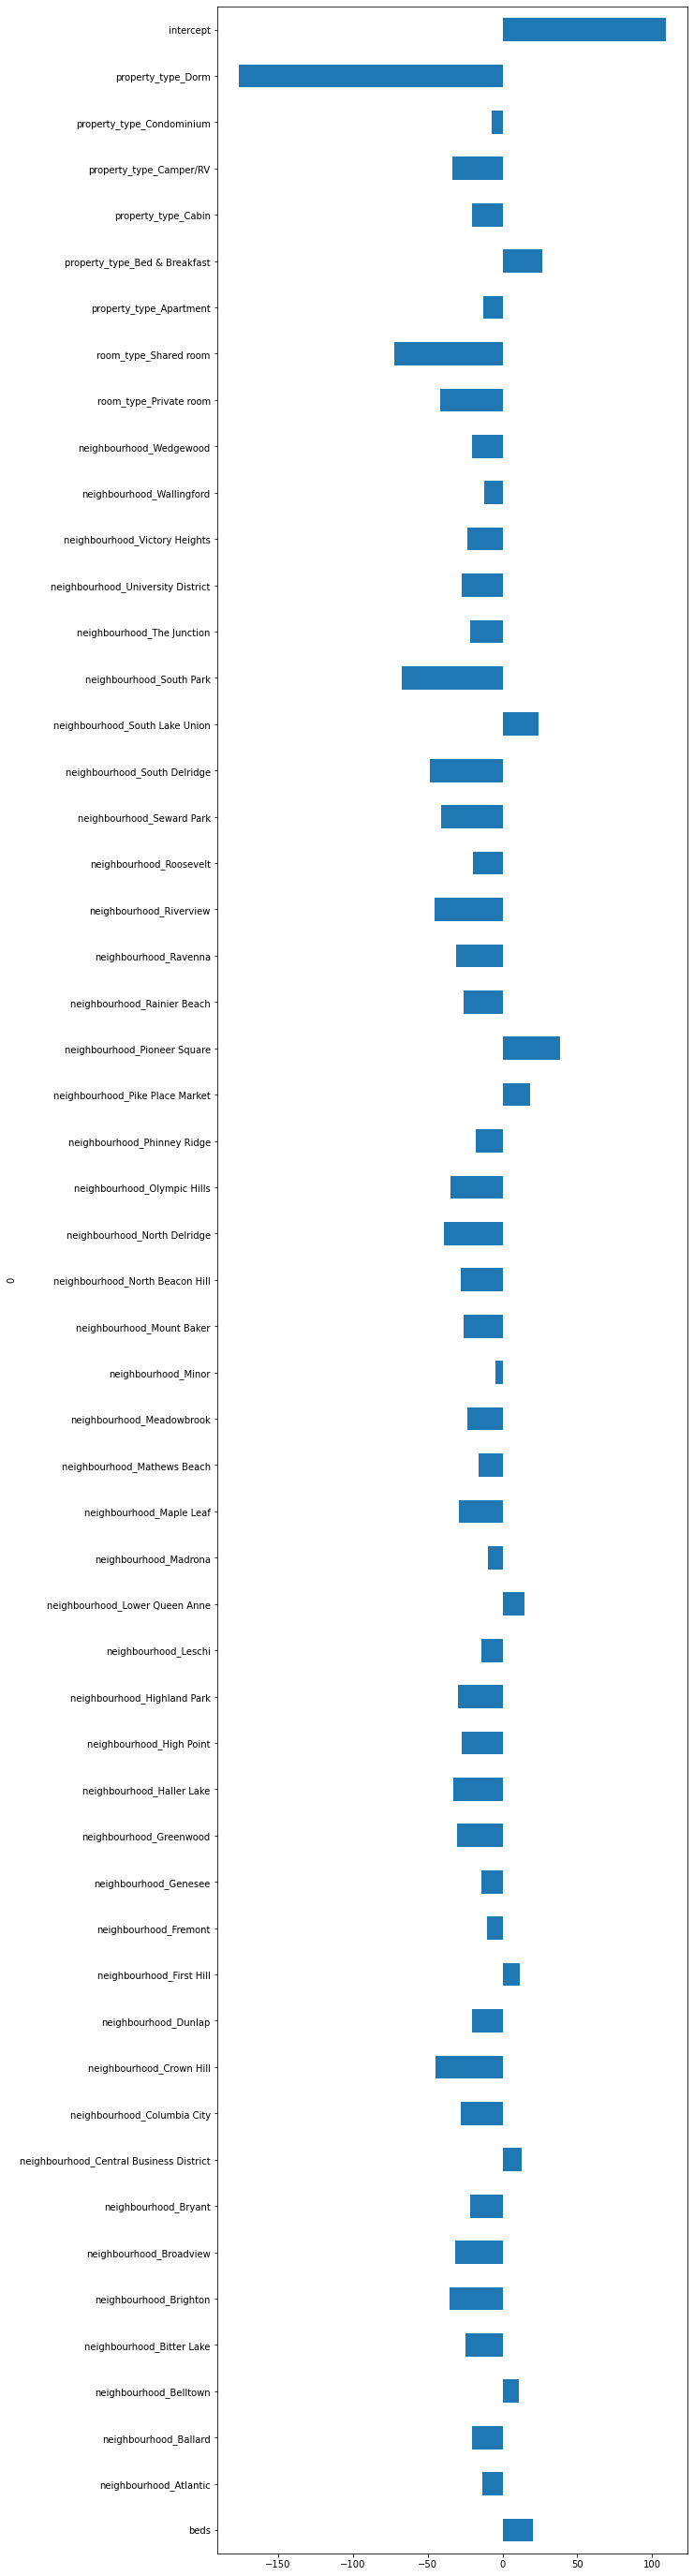

In [57]:
df_ols2=pd.DataFrame(results2.summary().tables[1].data)

df_final_coeficients=df_ols2.set_index(df_ols2.iloc[:,0]).iloc[1:105,1].astype(float)

df_final_coeficients.plot(kind='barh', figsize=(9, 50));

In [61]:
linreg_results_table=df_ols2.set_index(df_ols2.iloc[:,0])[[1]].reset_index().iloc[1:,:].reset_index().drop(columns='index')
linreg_results_table.columns=['features','coef']
linreg_results_table['coef']=linreg_results_table['coef'].astype(float)

<AxesSubplot:ylabel='features'>

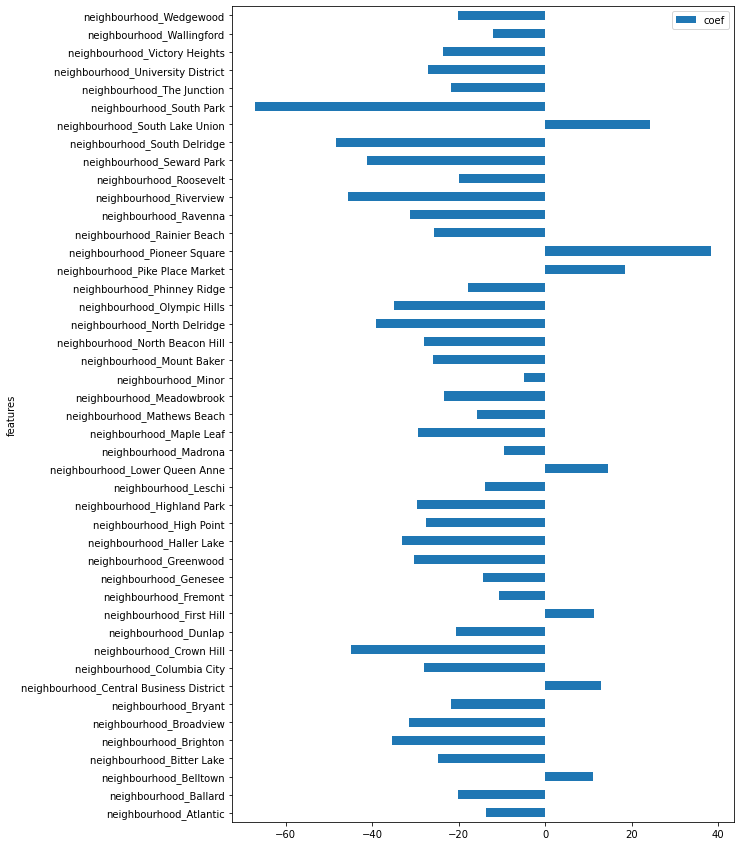

In [84]:
neighborhood_coefs_table=linreg_results_table[linreg_results_table['features'].str.contains('neighbourhood')]
neighborhood_coefs_table.set_index('features',inplace=True)
neighborhood_coefs_table.plot(kind=('barh'),figsize=(9, 15))

<AxesSubplot:ylabel='features'>

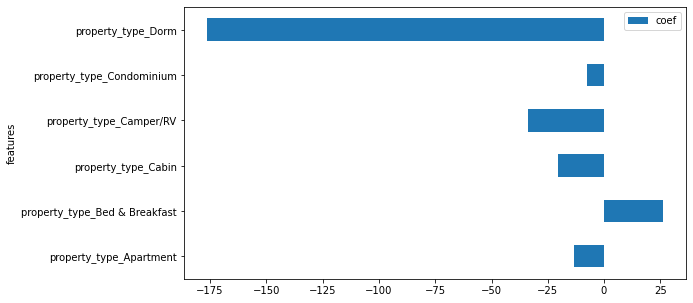

In [80]:
proprety_coefs_table=linreg_results_table[linreg_results_table['features'].str.contains('property')]
proprety_coefs_table.set_index('features',inplace=True)
proprety_coefs_table.plot(kind=('barh'),figsize=(9, 5))

<AxesSubplot:ylabel='features'>

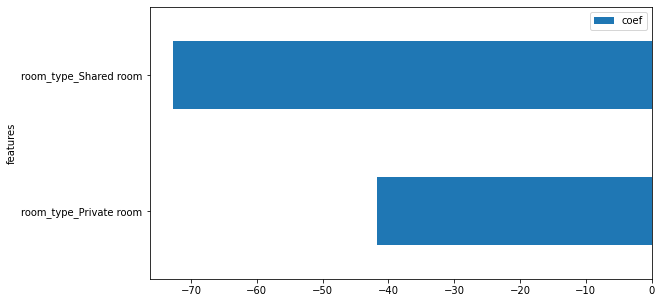

In [83]:
bedtype_coefs_table=linreg_results_table[linreg_results_table['features'].str.contains('room')]
bedtype_coefs_table.set_index('features',inplace=True)
bedtype_coefs_table.plot(kind=('barh'),figsize=(9, 5))

<AxesSubplot:ylabel='features'>

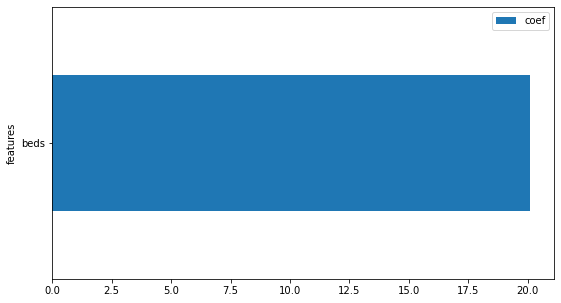

In [85]:
bedtype_coefs_table=linreg_results_table[linreg_results_table['features'].str.contains('bed')]
bedtype_coefs_table.set_index('features',inplace=True)
bedtype_coefs_table.plot(kind=('barh'),figsize=(9, 5))

So how can we read this ? 

we can say that being pioneer square , given that all other factors are kept constant, we would get a price higher with 38.28 dolars that being in capitol hill.

Propreties listed as bed & breakfast have a positive skew on price, aswell as the number of bedrooms, followed by bathrooms, beds and lastly guests number.


It seems like listing a dorm or a house in South park are both very bad for the price, aswell as many other features and how they can be affecting price

# 8 Deploy

You are the end user and you want a tool to compare your available choices. You can use this model to predict how the price might vary from one place to the other before even checking up on the lists

You also can be a home owner and you want to estimate how much you should realisticly ask as a price. Pretty handy analysis ? 

![image info](https://revenue-hub.com/wp-content/uploads/2019/10/airbnb-france-paris-1024x568.jpg)